In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread, imsave

In [ ]:
image=imread('../../../data/fairSim-full/Zeiss_Mito_600nm_large.tif').astype(np.float32)

In [100]:
def PSNR(gt, pred, range_=None ):
    if range_ is None:
        range_=np.max(gt)-np.min(gt)
    mse = np.mean((gt - pred)**2)
    return 20 * np.log10((range_)/np.sqrt(mse))

In [110]:
#plt.imshow(image[3,0,500:700,500:700])
#plt.imshow(image)
a=5
imageNoise=[]
for i in range(5):
    a=2.0**((i-6))
    imageScaled=(image-100)*a
    im=np.random.poisson(imageScaled)/a+100
    imageNoise.append(im)
    print(i,a,PSNR(image,im))
    imsave('../../../data/fairSim-full/Zeiss_Mito_600nm_crop_Poisson-n'+str(i)+'.tif',im.astype(np.uint16),imagej=True)

0 0.015625 28.640892461931514
1 0.03125 31.649179854073836
2 0.0625 34.65923384188434
3 0.125 37.66845549147875
4 0.25 40.681470569159934


(5, 25, 512, 512)


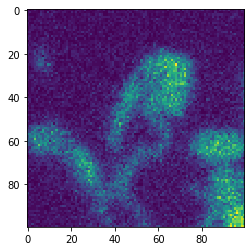

(5, 25, 512, 512)


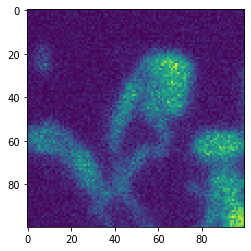

(5, 25, 512, 512)


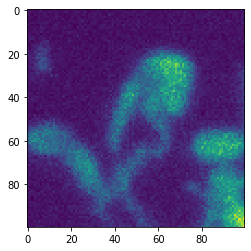

(5, 25, 512, 512)


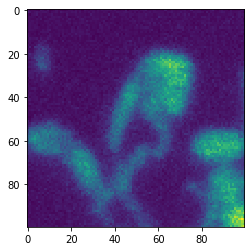

(5, 25, 512, 512)


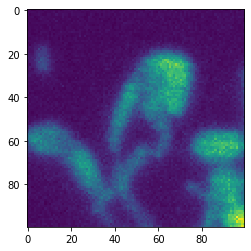

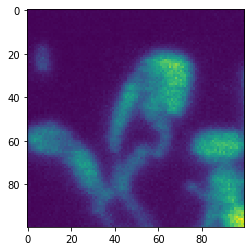

In [111]:
#plt.imshow(imageNoise[3,0,500:700,500:700])
for im in imageNoise:
    print(im.shape)
    plt.imshow(im[3,0,50:150,50:150])
    plt.show()
    
plt.imshow(image[3,0,50:150,50:150])
plt.show()